**Step 1: Load and Subset the Data**

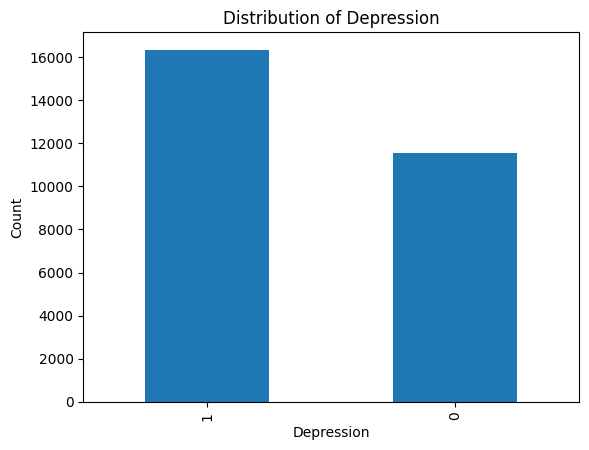

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Depression Dataset.csv')  # Replace with actual file path

# Select relevant features and target
features = [
    'Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
    'Financial Stress', 'Family History of Mental Illness'
]
target = 'Depression'

# Subset the data
X = data[features]
y = data[target]

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
y.value_counts().plot(kind='bar')
plt.title('Distribution of Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

### **Step 2: Preprocessing**

Encode Categorical Variables

In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
le = LabelEncoder()
for col in categorical_cols:
    X.loc[:, col] = le.fit_transform(X[col])

Scale Numerical Variables

In [8]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                  'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
scaler = StandardScaler()
X.loc[:, numerical_cols] = scaler.fit_transform(X.loc[:, numerical_cols])

Impute Missing Values

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)
X = pd.DataFrame(X, columns=features)

### **Step 3: Split the Data**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Step 4: Model 1 - Logistic Regression (Baseline)**

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.84      5581
weighted avg       0.84      0.84      0.84      5581

AUC-ROC: 0.835


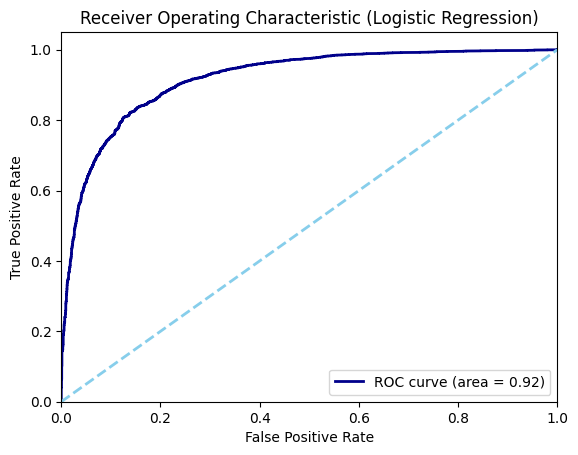

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_lr):.3f}")

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

### **Step 5: Model 2 - Random Forest (Feature Importance)**


Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

AUC-ROC: 0.831

Top 10 Feature Importance (Random Forest):
                                  Feature  Importance
11  Have you ever had suicidal thoughts ?    0.210439
3                       Academic Pressure    0.171221
5                                    CGPA    0.103172
13                       Financial Stress    0.102369
1                                     Age    0.095457
12                       Work/Study Hours    0.081138
10                                 Degree    0.073240
6                      Study Satisfaction    0.048959
8                          Sleep Duration    0.039571
9                          Dietary Habits    0.038

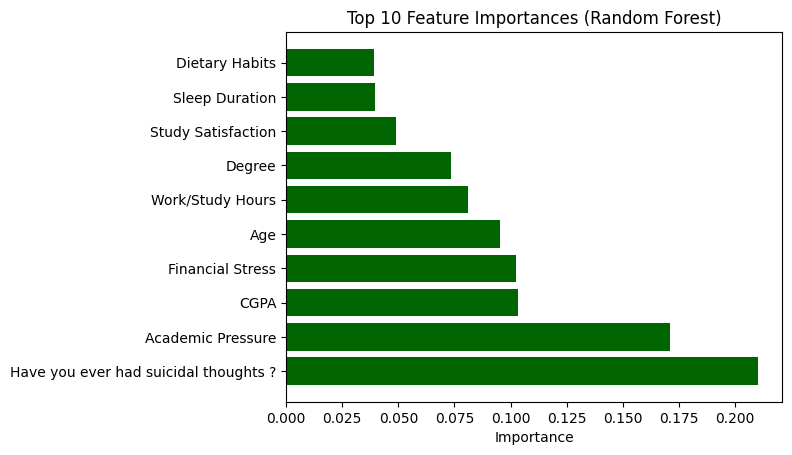

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_rf):.3f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importance (Random Forest):")
print(feature_importance.head(10))

# Plot feature importances
plt.barh(feature_importance['Feature'].head(10), feature_importance['Importance'].head(10), color='darkgreen')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

### **Step 6: Model 3 - XGBoost (Advanced)**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:47:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2313
           1       0.85      0.87      0.86      3268

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581

AUC-ROC: 0.825


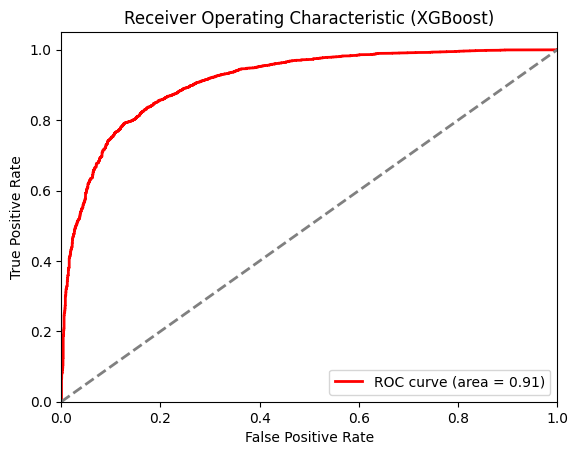

In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_xgb):.3f}")

# Plot ROC curve
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

### **Step 7: Hyperparameter Tuning for Random Forest**


Tuned Random Forest Results:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

AUC-ROC: 0.829


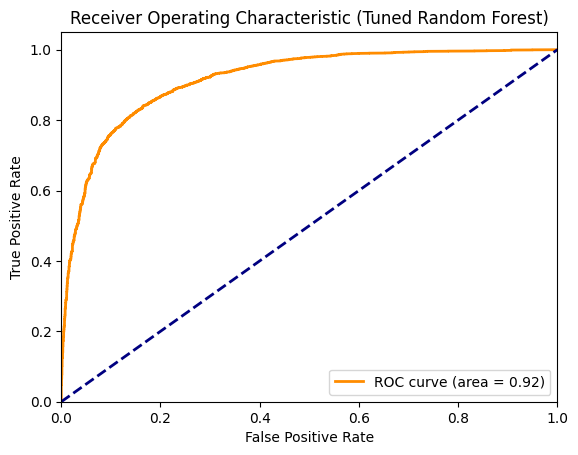

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='recall',  # Prioritize recall for depression detection
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nTuned Random Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(classification_report(y_test, y_pred_best))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best):.3f}")

# Plot ROC curve
y_prob_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.show()